## Objetivo

O projeto procura comparar a correlação de Taxa de Câmbio com as Exportações da Russia no seu período de Guerra (Janeiro de 2022) e também olhar esse comportamento durante o tempo. 

- Verificar descrições das variáveis dos DataFrames de mortes, câmbio e exportações
<br>

- Calcular taxa de câmbio mensal com média/mediana do fechamento do mês (utilizar biblioteca datetime)
<br>

- Visualizar como a taxa de câmbio se comporta nos últimos 5 anos através de um gráfico de linhas
<br>

- Fazer agrupamentos pela seção de exportações e verificar o valor total exportado por cada seção
<br>

- Fazer comparação com taxa de câmbio

### Data Frame - Exportação 

###### The Observatory of Economic Complexity.

OEC - Plataforma Especializada em dados de trocas comerciais (importações, exportações e taxas de câmbio).  Tambêm possuem blogs e pesquisas todas voltadas para a área da Economia.

<https://oec.world/en/profile/country/rus#:~:text=Yearly%20Exports,-%23permalink%20to%20section&text=In%202020%2C%20Russia%20exported%20a,to%20%24330B%20in%202020>

In [1]:
import pandas as pd

In [20]:
export = pd.read_csv('Products-Exports-Jan-2022----Click-to-Select-a-Product.csv')

In [21]:
export.head()

,Section ID,Section,HS2 ID,HS2,HS4 ID,HS4,Year,Quarter ID,Quarter,Month ID,Month,Time,Trade Value
0,1,Animal Products,101,Live animals,10101,Horses,2022,1,Q1,1,January,202201,140448.01
1,1,Animal Products,101,Live animals,10102,Bovine,2022,1,Q1,1,January,202201,162982.54
2,1,Animal Products,101,Live animals,10103,Pigs,2022,1,Q1,1,January,202201,1143667.23
3,1,Animal Products,101,Live animals,10104,Sheep and Goats,2022,1,Q1,1,January,202201,42038.64
4,1,Animal Products,101,Live animals,10105,Poultry,2022,1,Q1,1,January,202201,614400.94


#### Harmonized Sistem (HS)

###### São códigos de produtos os quais podem ser lidos em qualquer parte do mundo, para identificação de produtos.

In [22]:
export.median()

C:\Users\user-07\AppData\Local\Temp/ipykernel_16320/3128659718.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  export.median()


Section ID         11.00
HS2 ID           1153.00
HS4 ID         115308.50
Year             2022.00
Quarter ID          1.00
Month ID            1.00
Time           202201.00
Trade Value    743568.17
dtype: float64

In [23]:
export.describe()

,Section ID,HS2 ID,HS4 ID,Year,Quarter ID,Month ID,Time,Trade Value
count,1122.000000,1122.000000,1122.000000,1122.0,1122.0,1122.0,1122.0,1.122000e+03
mean,10.165775,1068.762032,106889.091800,2022.0,1.0,1.0,202201.0,4.068556e+07
std,5.352779,562.623721,56265.955941,0.0,0.0,0.0,0.0,4.767522e+08
min,1.000000,101.000000,10101.000000,2022.0,1.0,1.0,202201.0,1.380000e+00
25%,6.000000,628.000000,62839.250000,2022.0,1.0,1.0,202201.0,1.171821e+05
50%,11.000000,1153.000000,115308.500000,2022.0,1.0,1.0,202201.0,7.435682e+05
75%,15.000000,1578.750000,157877.250000,2022.0,1.0,1.0,202201.0,4.400112e+06
max,22.000000,2299.000000,229999.000000,2022.0,1.0,1.0,202201.0,1.031496e+10


In [24]:
export['Section'].value_counts()

Chemical Products                   163
Metals                              137
Textiles                            136
Machines                            130
Vegetable Products                   75
Mineral Products                     59
Foodstuffs                           54
Instruments                          50
Stone And Glass                      46
Plastics and Rubbers                 42
Animal Products                      41
Paper Goods                          38
Miscellaneous                        31
Wood Products                        26
Transportation                       25
Footwear and Headwear                18
Animal and Vegetable Bi-Products     18
Precious Metals                      16
Animal Hides                         16
Unspecified                           1
Name: Section, dtype: int64

In [25]:
filt = export['Section'] == 'Chemical Products'
export.loc[filt]['Trade Value'].sum()

2473088660.19

In [26]:
Section_group = export.groupby(['Section'])

In [27]:
Section_group['Trade Value'].sum()

Section
Animal Hides                        1.223073e+07
Animal Products                     4.144378e+08
Animal and Vegetable Bi-Products    4.108023e+08
Chemical Products                   2.473089e+09
Foodstuffs                          5.269305e+08
Footwear and Headwear               1.629997e+07
Instruments                         8.994873e+07
Machines                            8.997067e+08
Metals                              5.495889e+09
Mineral Products                    2.004158e+10
Miscellaneous                       7.771348e+07
Paper Goods                         4.191792e+08
Plastics and Rubbers                7.158085e+08
Precious Metals                     1.542263e+09
Stone And Glass                     1.124329e+08
Textiles                            9.232416e+07
Transportation                      3.789569e+08
Unspecified                         1.031496e+10
Vegetable Products                  8.384156e+08
Wood Products                       7.762252e+08
Name: Trade 

### DataFrame - Taxa de Câmbio

fedesoriano. (April 2022). USD / RUB - Historical Data. Retrieved [Date Retrieved] from <https://www.kaggle.com/datasets/fedesoriano/usd-rub-historical-data>

In [7]:
cambio = pd.read_csv('USD_RUB.csv')

In [8]:
cambio.axes

[RangeIndex(start=0, stop=5320, step=1),
 Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')]

In [9]:
cambio

,Date,Price,Open,High,Low,Change %
0,Apr 14 2022,80.9957,79.8675,82.3836,79.8563,1.41%
1,Apr 13 2022,79.8675,79.6800,80.2965,79.4078,0.24%
2,Apr 12 2022,79.6800,79.0650,80.2549,78.6952,0.78%
3,Apr 11 2022,79.0650,76.0800,81.2950,76.0800,3.92%
4,Apr 08 2022,76.0800,75.7500,76.2590,71.3993,0.44%
...,...,...,...,...,...,...
5315,Sep 20 2001,29.4300,29.4550,29.4760,29.4030,-0.08%
5316,Sep 19 2001,29.4530,29.4600,29.4810,29.4300,-0.02%
5317,Sep 18 2001,29.4600,29.4450,29.4750,29.4400,-0.00%
5318,Sep 17 2001,29.4610,29.4600,29.4730,29.4400,-0.04%


In [10]:
cambio['Date'] = pd.to_datetime(cambio['Date'])
cambio.set_index('Date', inplace=True)

In [11]:
cambio

,Price,Open,High,Low,Change %
Date,,,,,
2022-04-14,80.9957,79.8675,82.3836,79.8563,1.41%
2022-04-13,79.8675,79.6800,80.2965,79.4078,0.24%
2022-04-12,79.6800,79.0650,80.2549,78.6952,0.78%
2022-04-11,79.0650,76.0800,81.2950,76.0800,3.92%
2022-04-08,76.0800,75.7500,76.2590,71.3993,0.44%
...,...,...,...,...,...
2001-09-20,29.4300,29.4550,29.4760,29.4030,-0.08%
2001-09-19,29.4530,29.4600,29.4810,29.4300,-0.02%
2001-09-18,29.4600,29.4450,29.4750,29.4400,-0.00%


In [12]:
cambio['2022-01']

C:\Users\user-07\AppData\Local\Temp/ipykernel_16320/2762744906.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  cambio['2022-01']


,Price,Open,High,Low,Change %
Date,,,,,
2022-01-31,77.3792,77.8279,77.8314,77.2718,-0.58%
2022-01-28,77.8279,78.0065,78.2870,77.4150,-0.23%
2022-01-27,78.0065,79.4960,79.7310,77.4233,-1.87%
2022-01-26,79.4960,78.6456,80.3251,78.5324,1.08%
2022-01-25,78.6456,78.7860,79.3147,78.3099,-0.18%
2022-01-24,78.7860,77.4485,79.4754,76.9856,1.73%
2022-01-21,77.4485,76.6814,77.5318,76.2921,1.00%
2022-01-20,76.6814,76.2065,76.7738,76.0106,0.62%
2022-01-19,76.2065,76.9350,77.1589,75.8714,-0.95%


In [13]:
# Calculo da média 
media_cambio_nov = cambio.loc['2021-11']['Price'].mean()
media_cambio_dez = cambio.loc['2021-12']['Price'].mean()
media_cambio_jan = cambio.loc['2022-01']['Price'].mean()
media_cambio_fev = cambio.loc['2022-02']['Price'].mean()
media_cambio_mar = cambio.loc['2022-03']['Price'].mean()

# Calculo da mediana
median_cambio_nov = cambio.loc['2021-11']['Price'].median()
median_cambio_dez = cambio.loc['2021-12']['Price'].median()
median_cambio_jan = cambio.loc['2022-01']['Price'].median()
median_cambio_fev = cambio.loc['2022-02']['Price'].median()
median_cambio_mar = cambio.loc['2022-03']['Price'].median()

In [14]:
pd.DataFrame()

""


### DICA : CRIAR UM DATAFRAME (pd.DataFrame) COM AS VARIÁVEIS DE CÂMBIO DE MÉDIA E MEDIANA 

Antes t

In [15]:
dict = {'Meses': ['Novembro 2021','Dezembro 2021','Janeiro 2022', 'Fevereiro 2022', 'Março 2022'], 'Média': [media_cambio_nov, media_cambio_dez, media_cambio_jan, media_cambio_fev, media_cambio_mar],'Mediana': [median_cambio_nov, median_cambio_dez, median_cambio_jan, median_cambio_fev, median_cambio_mar]}

In [16]:
data = pd.DataFrame(dict)

In [17]:
data

,Meses,Média,Mediana
0,Novembro 2021,72.938305,72.89190
1,Dezembro 2021,73.845641,73.76425
2,Janeiro 2022,76.617710,76.31300
3,Fevereiro 2022,79.942150,76.64535
4,Março 2022,106.447391,104.82000


In [18]:
import matplotlib.pyplot as plt
import numpy as np

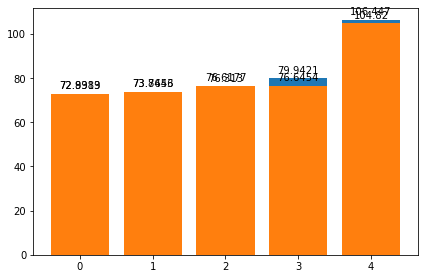

In [19]:
Data = data['Meses']
Media = data['Média']
Mediana = data['Mediana']

fig, ax = plt.subplots()
x = np.arange(len(Data))

rects1 = ax.bar(x,  Media,  width = 0.8, label='Media')
rects2 = ax.bar(x, Mediana, width = 0.8, label='Mediana')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()


In [ ]:
Data